In [ ]:
# Re-import necessary libraries after code execution environment reset
import pandas as pd
import random
from datetime import datetime, timedelta

# Parameters
start_date = datetime(2005, 1, 1)
end_date = datetime(2023, 12, 31)
days_range = (end_date - start_date).days
daily_meetings = 1
soulmate_probability = 0.01

# Simulate meetings
data = []
person_id = 1

for day_offset in range(days_range):
    current_date = start_date + timedelta(days=day_offset)
    for _ in range(daily_meetings):
        soulmate = random.random() < soulmate_probability
        data.append({
            'date': current_date,
            'person_id': person_id,
            'is_soulmate': soulmate
        })
        person_id += 1

# Convert to DataFrame
df_soulmate = pd.DataFrame(data)

# Display basic info and save
df_soulmate.head(), df_soulmate['is_soulmate'].sum(), df_soulmate.shape


(        date  person_id  is_soulmate
 0 2005-01-01          1        False
 1 2005-01-02          2        False
 2 2005-01-03          3        False
 3 2005-01-04          4        False
 4 2005-01-05          5        False,
 68,
 (6938, 3))

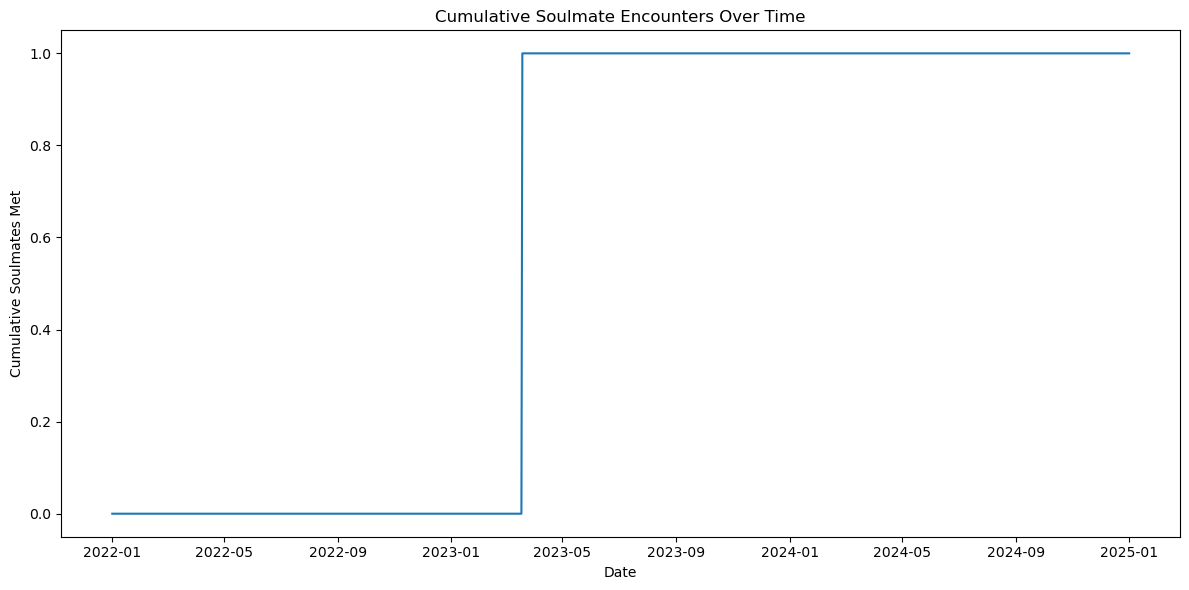

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For reproducibility
np.random.seed(42)

# Step 1: Generate dataset
days = pd.date_range(start='2022-01-01', end='2025-01-01')
n_days = len(days)

# Assume user meets 0 to 5 new people each day
people_met = np.random.poisson(lam=2, size=n_days)  # average 2 people/day
total_meetings = sum(people_met)

# Assign each person a unique ID and meeting date
dates = []
for day, count in zip(days, people_met):
    dates.extend([day] * count)

df = pd.DataFrame({
    'date_met': dates
})

# Step 2: Assume small chance that any person is a soulmate (e.g., 0.01%)
df['is_soulmate'] = np.random.rand(len(df)) < 0.0001  # 0.01% chance

# Step 3: Cumulative number of soulmates over time
df['soulmate_count'] = df['is_soulmate'].cumsum()
daily_soulmates = df.groupby('date_met')['is_soulmate'].sum().cumsum()

# Step 4: Visualization
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_soulmates)
plt.title('Cumulative Soulmate Encounters Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Soulmates Met')
plt.tight_layout()
plt.show()


   age  people_met_per_year personality_type location  soulmate_probability
0   24                   26        Extrovert    Urban              0.003650
1   37                   37        Extrovert    Rural              0.003030
2   46                   24         Ambivert    Urban              0.002851
3   32                   41        Extrovert    Urban              0.007675
4   28                   31        Extrovert    Rural              0.003385

Summary statistics:
              age  people_met_per_year  soulmate_probability
count  500.000000            500.00000            500.000000
mean    33.824000             29.65800              0.003416
std      9.777537              5.85368              0.001254
min     18.000000             13.00000              0.001058
25%     25.000000             25.00000              0.002384
50%     34.000000             30.00000              0.003276
75%     43.000000             33.00000              0.004212
max     49.000000             47.00

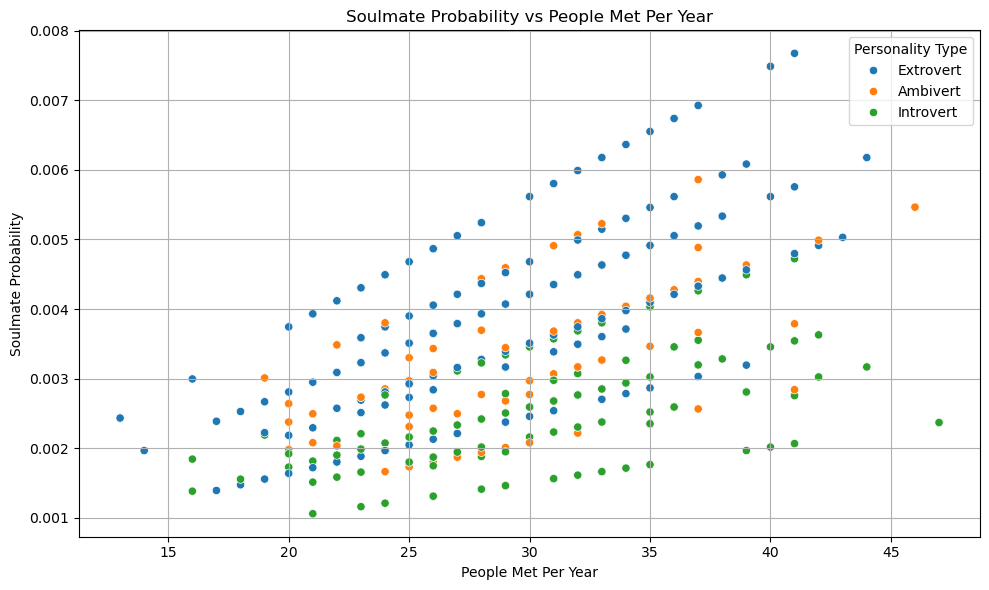

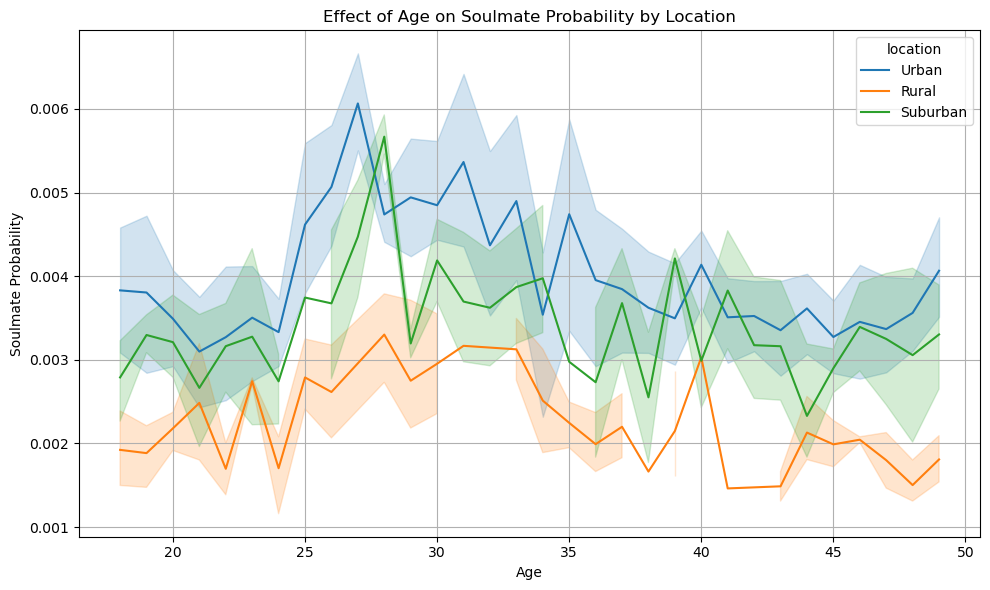

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the synthetic soulmate dataset
df = pd.read_csv('soulmate_meetings.csv')

# Display the first few rows
print(df.head())

# Summary statistics
print("\nSummary statistics:")
print(df.describe())

# Check how soulmate_probability relates to number of people met
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='people_met_per_year', y='soulmate_probability', hue='personality_type')
plt.title('Soulmate Probability vs People Met Per Year')
plt.xlabel('People Met Per Year')
plt.ylabel('Soulmate Probability')
plt.legend(title='Personality Type')
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: Look at how age affects soulmate meeting
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='age', y='soulmate_probability', hue='location')
plt.title('Effect of Age on Soulmate Probability by Location')
plt.xlabel('Age')
plt.ylabel('Soulmate Probability')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("soulmate_meetings.csv")

# Preview the first 5 rows
print("First 5 records:\n", df.head())

# Check data types and missing values
print("\nDataset Info:")
print(df.info())

# Summary statistics
print("\nSummary Statistics:")
print(df.describe(include='all'))


First 5 records:
    age  people_met_per_year personality_type location  soulmate_probability
0   24                   26        Extrovert    Urban              0.003650
1   37                   37        Extrovert    Rural              0.003030
2   46                   24         Ambivert    Urban              0.002851
3   32                   41        Extrovert    Urban              0.007675
4   28                   31        Extrovert    Rural              0.003385

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   500 non-null    int64  
 1   people_met_per_year   500 non-null    int64  
 2   personality_type      500 non-null    object 
 3   location              500 non-null    object 
 4   soulmate_probability  500 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usa

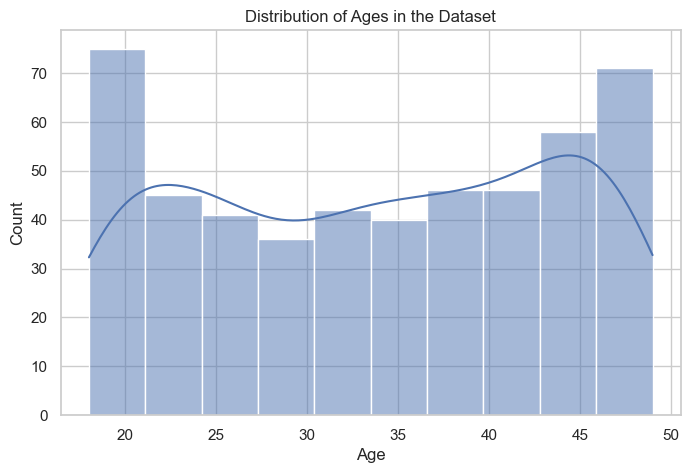

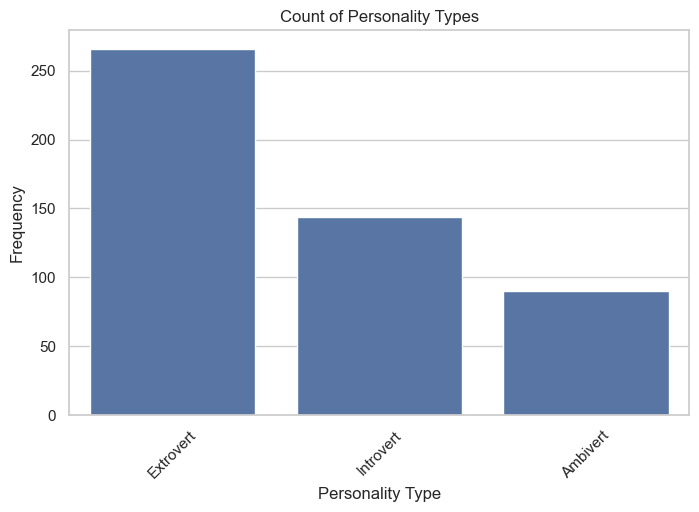

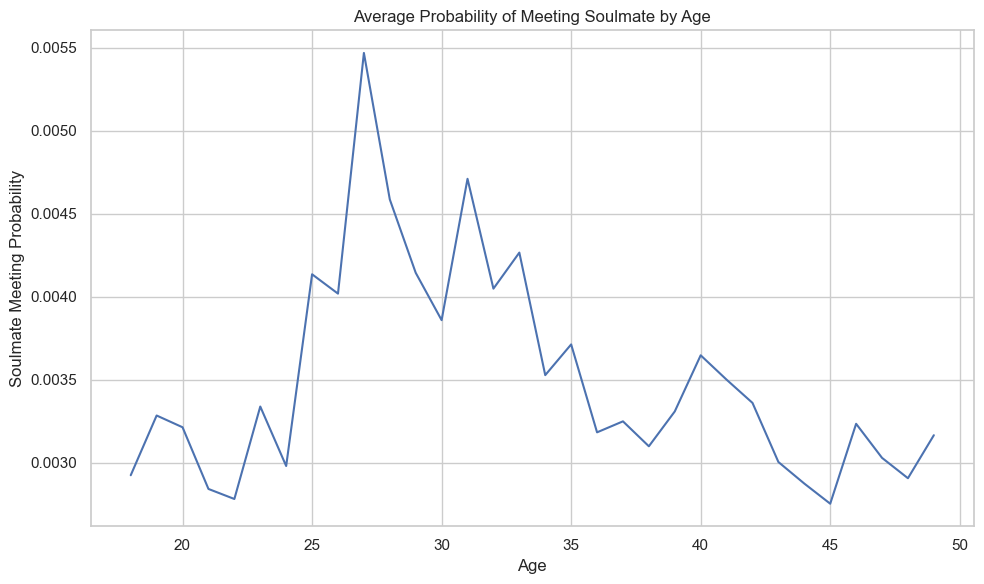

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# 1. Age distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['age'], bins=10, kde=True)
plt.title("Distribution of Ages in the Dataset")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# 2. Personality type count
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='personality_type', order=df['personality_type'].value_counts().index)
plt.title("Count of Personality Types")
plt.xlabel("Personality Type")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
age_grouped = df.groupby('age')['soulmate_probability'].mean().reset_index()
sns.lineplot(data=age_grouped, x='age', y='soulmate_probability')
plt.title("Average Probability of Meeting Soulmate by Age")
plt.xlabel("Age")
plt.ylabel("Soulmate Meeting Probability")
plt.grid(True)
plt.tight_layout()
plt.show()



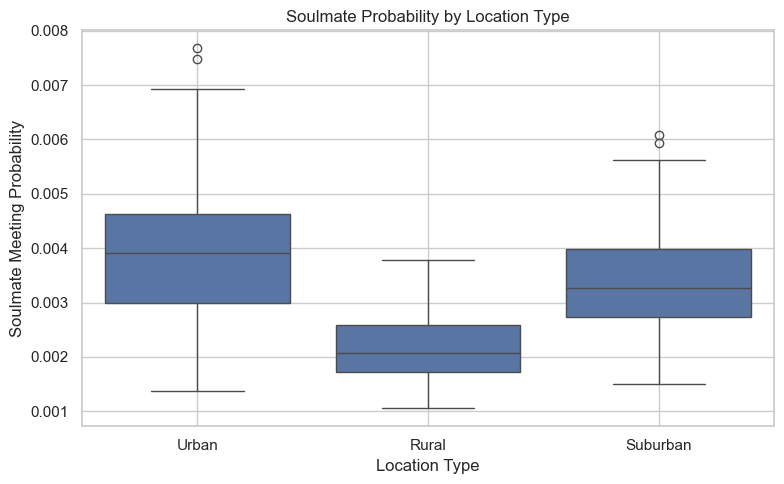

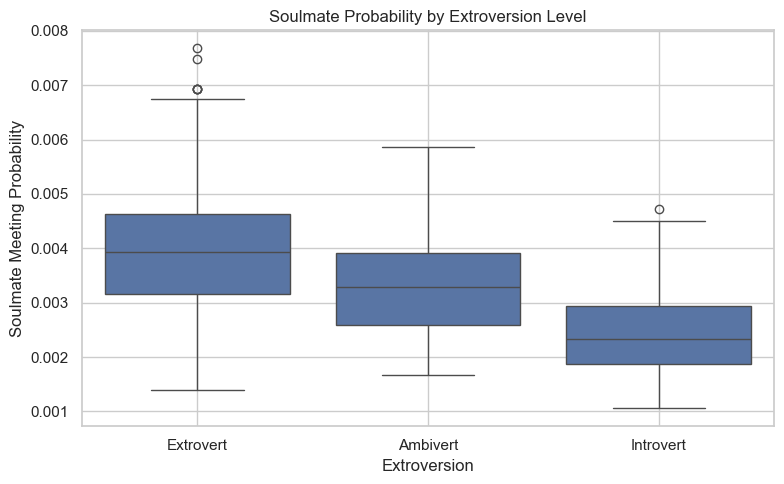

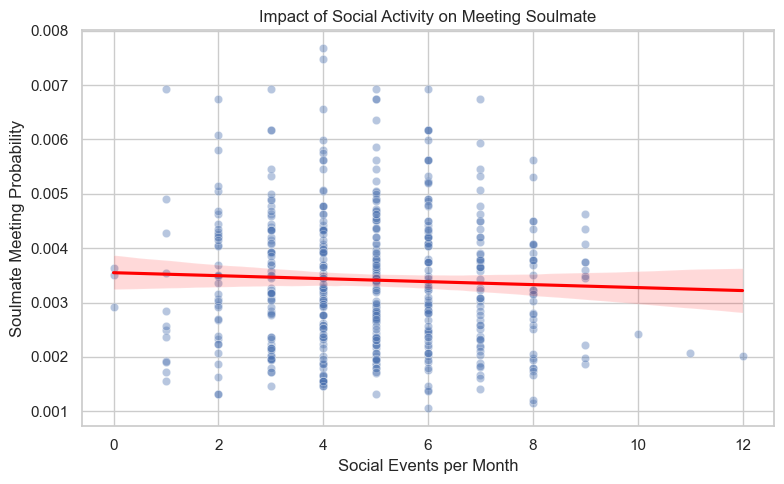

In [ ]:
# 1. Soulmate Probability by Location
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='location', y='soulmate_probability')
plt.title("Soulmate Probability by Location Type")
plt.ylabel("Soulmate Meeting Probability")
plt.xlabel("Location Type")
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Soulmate Probability by Extroversion
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='personality_type', y='soulmate_probability')
plt.title("Soulmate Probability by Extroversion Level")
plt.ylabel("Soulmate Meeting Probability")
plt.xlabel("Extroversion")
plt.grid(True)
plt.tight_layout()
plt.show()

import numpy as np

# Simulate social activity: 0 to 20 events per month
df['social_events_per_month'] = np.random.poisson(lam=5, size=len(df))


# 4. Probability vs. Social Events per Month
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='social_events_per_month', y='soulmate_probability', alpha=0.4)
sns.regplot(data=df, x='social_events_per_month', y='soulmate_probability', scatter=False, color='red')
plt.title("Impact of Social Activity on Meeting Soulmate")
plt.xlabel("Social Events per Month")
plt.ylabel("Soulmate Meeting Probability")
plt.grid(True)
plt.tight_layout()
plt.show()



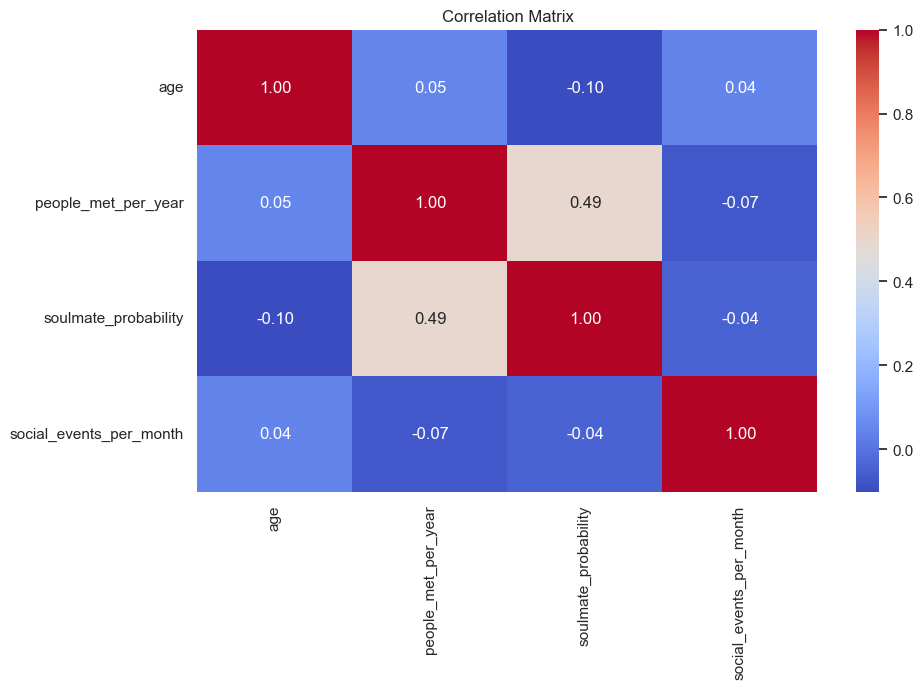

Top variables influencing soulmate_probability:

soulmate_probability       1.000000
people_met_per_year        0.494867
social_events_per_month   -0.041837
age                       -0.100461
Name: soulmate_probability, dtype: float64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()
# Sort correlations with soulmate_probability
correlations = correlation_matrix['soulmate_probability'].sort_values(ascending=False)
print("Top variables influencing soulmate_probability:\n")
print(correlations)


In [ ]:
# Define input features and target
features = ['age', 'people_met_per_year', 'social_events_per_month']
target = 'soulmate_probability'

X = df[features]
y = df[target]

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("R^2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


R^2 Score: 0.11877049408777873
MSE: 1.2936106245021902e-06


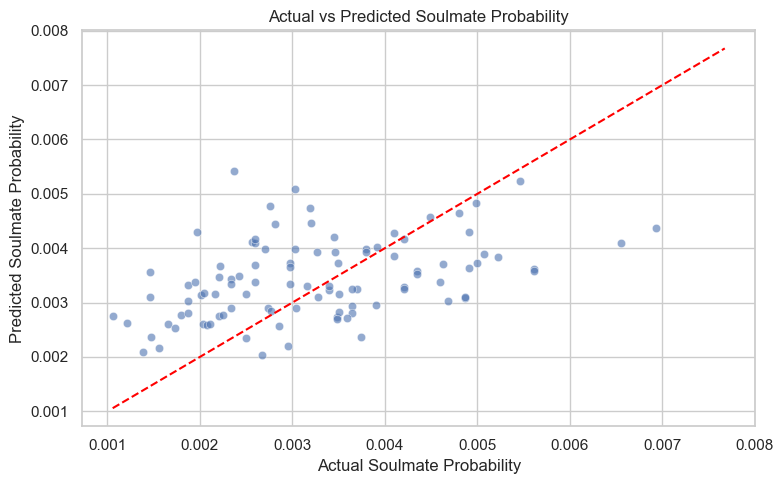

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')  # Ideal line
plt.xlabel("Actual Soulmate Probability")
plt.ylabel("Predicted Soulmate Probability")
plt.title("Actual vs Predicted Soulmate Probability")
plt.grid(True)
plt.tight_layout()
plt.show()


people_met_per_year        0.000115
age                       -0.000017
social_events_per_month    0.000016
dtype: float64


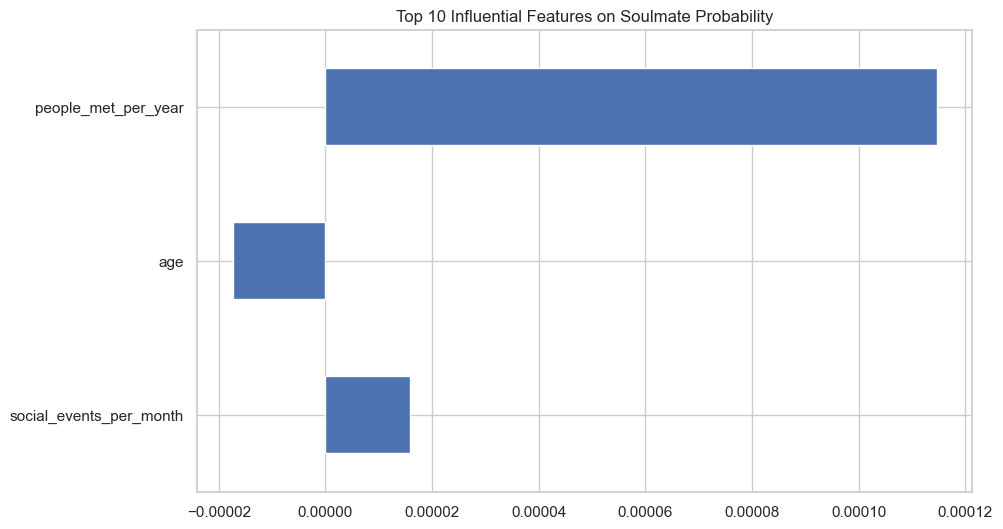

In [ ]:
coefficients = pd.Series(model.coef_, index=X.columns).sort_values(key=abs, ascending=False)
print(coefficients)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
coefficients.head(10).plot(kind='barh')
plt.title("Top 10 Influential Features on Soulmate Probability")
plt.gca().invert_yaxis()
plt.show()


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

print(f'R²: {r2:.3f}')
print(f'MSE: {mse:.3f}')
print(f'RMSE: {rmse:.3f}')
print(f'MAE: {mae:.3f}')


R²: 0.119
MSE: 0.000
RMSE: 0.001
MAE: 0.001


C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


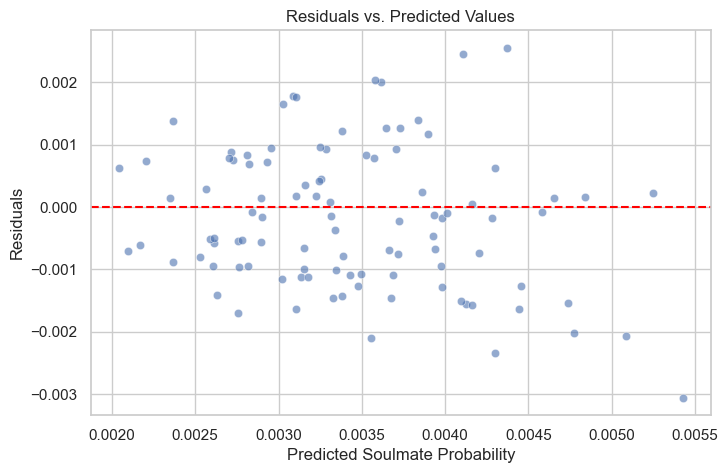

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

residuals = y_test - y_pred

plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Soulmate Probability')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f'Cross-validated R² scores: {scores}')
print(f'Mean CV R²: {scores.mean():.3f}')


Cross-validated R² scores: [0.34331617 0.21994975 0.17698249 0.23074812 0.20726085]
Mean CV R²: 0.236


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
rf_preds = rf_model.predict(X_test)

# Evaluate performance
r2_rf = r2_score(y_test, rf_preds)
mse_rf = mean_squared_error(y_test, rf_preds)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, rf_preds)

print(f"Random Forest R²: {r2_rf:.3f}")
print(f"Random Forest MSE: {mse_rf:.6f}")
print(f"Random Forest RMSE: {rmse_rf:.6f}")
print(f"Random Forest MAE: {mae_rf:.6f}")


Random Forest R²: 0.089
Random Forest MSE: 0.000001
Random Forest RMSE: 0.001157
Random Forest MAE: 0.000949


In [ ]:
# Create interaction features
df['age_x_social'] = df['age'] * df['social_events_per_month']
df['age_x_met'] = df['age'] * df['people_met_per_year']
df['met_x_social'] = df['people_met_per_year'] * df['social_events_per_month']

# New feature set
features = ['age', 'people_met_per_year', 'social_events_per_month', 
            'age_x_social', 'age_x_met', 'met_x_social']

X = df[features]
y = df['soulmate_probability']


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Split the updated data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Retrain the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate performance
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print("Linear Regression with Interactions")
print("R²:", round(r2, 3))
print("MSE:", round(mse, 6))
print("RMSE:", round(rmse, 6))
print("MAE:", round(mae, 6))


Linear Regression with Interactions
R²: 0.121
MSE: 1e-06
RMSE: 0.001136
MAE: 0.000943


In [ ]:
# One-hot encode 'personality_type'
df_encoded = pd.get_dummies(df, columns=['personality_type'], drop_first=True)

# Define new features (excluding target)
feature_columns = [col for col in df_encoded.columns if col not in ['soulmate_probability', 'location']]

# Define X and y
X = df_encoded[feature_columns]
y = df_encoded['soulmate_probability']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions and metrics
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print("R²:", round(r2, 3))
print("MSE:", round(mse, 6))
print("RMSE:", round(rmse, 6))
print("MAE:", round(mae, 6))


R²: 0.503
MSE: 1e-06
RMSE: 0.000854
MAE: 0.000669


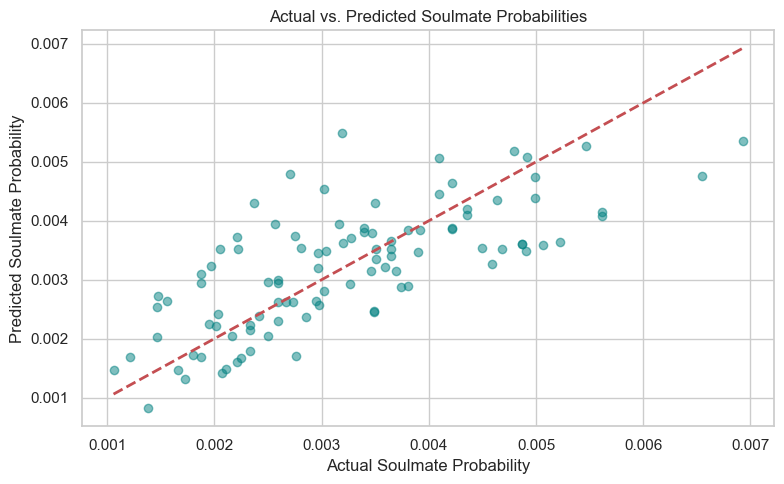

In [ ]:
import matplotlib.pyplot as plt

# Predict on test data
y_pred = model.predict(X_test)

# Scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.5, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # perfect prediction line
plt.xlabel("Actual Soulmate Probability")
plt.ylabel("Predicted Soulmate Probability")
plt.title("Actual vs. Predicted Soulmate Probabilities")
plt.grid(True)
plt.tight_layout()
plt.show()


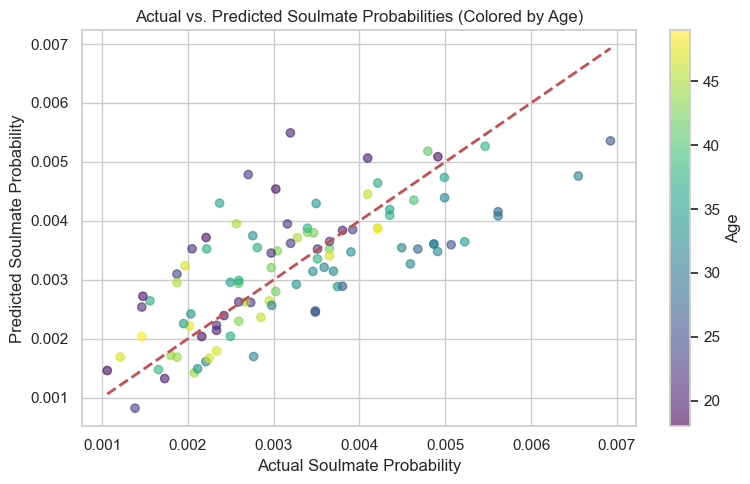

In [ ]:
import matplotlib.pyplot as plt

# Predict on test data
y_pred = model.predict(X_test)

# Plot
plt.figure(figsize=(8, 5))
scatter = plt.scatter(y_test, y_pred, c=X_test['age'], cmap='viridis', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

# Labels
plt.xlabel("Actual Soulmate Probability")
plt.ylabel("Predicted Soulmate Probability")
plt.title("Actual vs. Predicted Soulmate Probabilities (Colored by Age)")
plt.colorbar(scatter, label='Age')
plt.grid(True)
plt.tight_layout()
plt.show()


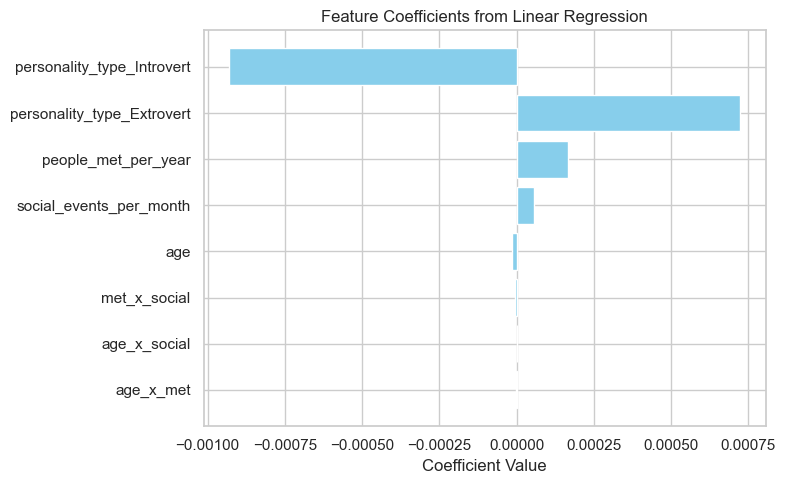

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Coefficients from linear regression
coefficients = model.coef_
features = X.columns

coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
coef_df = coef_df.sort_values(by='Coefficient', key=abs, ascending=False)  # sort by absolute value

# Plot
plt.figure(figsize=(8, 5))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Coefficient Value")
plt.title("Feature Coefficients from Linear Regression")
plt.tight_layout()
plt.show()


In [ ]:
import joblib

# assuming 'model' is your trained LinearRegression model
joblib.dump(model, 'soulmate_model.pkl')


['soulmate_model.pkl']

In [ ]:
import streamlit as st
import pandas as pd
import joblib

# Load the saved model
model = joblib.load('soulmate_model.pkl')

st.title("Soulmate Probability Predictor")

# Input widgets
age = st.number_input('Age', min_value=18, max_value=100, value=25)
people_met_per_year = st.number_input('People Met Per Year', min_value=0, max_value=1000, value=100)
social_events_per_month = st.number_input('Social Events Per Month', min_value=0, max_value=50, value=5)

# Prepare input data as DataFrame
input_df = pd.DataFrame({
    'age': [age],
    'people_met_per_year': [people_met_per_year],
    'social_events_per_month': [social_events_per_month]
})

if st.button('Predict Soulmate Probability'):
    # Predict using the loaded model
    prediction = model.predict(input_df)[0]
    st.write(f"Estimated soulmate probability: {prediction:.4f}")


2025-05-19 18:17:59.075 
  command:

    streamlit run C:\Users\Administrator\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [ ]:
import streamlit as st
import pandas as pd
import numpy as np
import joblib

# Load trained model
model = joblib.load("soulmate_model.pkl")  # Replace with your trained model path

st.set_page_config(page_title="Soulmate Probability Predictor", layout="centered")

st.title("💘 Soulmate Probability Predictor")
st.markdown("""
Welcome to the Soulmate Probability Predictor! Based on your lifestyle and social habits,
this app estimates the probability of you meeting your soulmate. Fill in the form below to see your prediction.
""")

# --- Input Form ---
age = st.slider("Your Age", 18, 60, 25)
social_events = st.slider("How many social events do you attend per month?", 0, 30, 5)
people_met = st.slider("Roughly how many new people do you meet per year?", 0, 1000, 100)
personality_type = st.selectbox("Your Personality Type", ['Introvert', 'Ambivert', 'Extrovert'])
location = st.selectbox("Your Location Type", ['Urban', 'Suburban', 'Rural'])

# --- Encode Inputs ---
personality_map = {'Introvert': 0, 'Ambivert': 1, 'Extrovert': 2}
location_map = {'Urban': 0, 'Suburban': 1, 'Rural': 2}

input_data = pd.DataFrame({
    'age': [age],
    'social_events_per_month': [social_events],
    'people_met_per_year': [people_met],
    'personality_type': [personality_map[personality_type]],
    'location': [location_map[location]]
})

# --- Predict ---
if st.button("Predict My Soulmate Probability"):
    prediction = model.predict(input_data)[0]
    st.subheader(f"💘 Estimated Probability: {prediction * 100:.2f}%")

    if prediction > 0.7:
        st.success("You're highly likely to meet your soulmate soon! 🌟")
    elif prediction > 0.4:
        st.info("There’s a fair chance you’ll find them—stay open and social!")
    else:
        st.warning("The probability is a bit low—try expanding your social circles!")

st.markdown("---")
st.caption("Built by Tshedza Tshikovhi | Data Science & Love")


DeltaGenerator()